In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# remove kmpl from mileage and convert it into float type from object type
df['mileage'] = df['mileage'].apply(lambda x: float(x.split()[0]) if type(x)==str else np.nan)
df['mileage'] = df['mileage'].astype("float")

In [7]:
# remove CC from engine variable 
df['engine'] = df['engine'].apply(lambda x: x.replace("CC","") if type(x)==str else np.nan)

In [8]:
# remove bhp from max_power and convert it into float type from object type
df['max_power'] = df['max_power'].apply(lambda x : x.split()[0] if type(x)==str else np.nan )

#### Missing values

In [9]:
# check missing values percentage in each column
df.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

torque       2.73
seats        2.72
engine       2.72
mileage      2.72
max_power    2.65
dtype: float64

In [10]:
df.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [11]:
# we will drop the torque as it doesn't have proper format
df.drop(["torque"],axis=1,inplace=True)

In [12]:
# check missing values percentage in each column
df.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

seats        2.72
engine       2.72
mileage      2.72
max_power    2.65
owner        0.00
dtype: float64

In [13]:
df[df["mileage"].isnull() & df["engine"].isnull() & df["seats"].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN


above rows indicate pattern in missing values, it is better to drop them instead of imputing

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(7907, 12)

In [16]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2,5.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 803.1+ KB


In [18]:
df[df['max_power'].str.contains('bhp')]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796,bhp,8.0


In [19]:
# we have one row containing only bhp with no value in it, lets drop it
df = df[df['max_power'].str.contains('bhp') == False]

In [20]:
# convert from object type to their respective types
df["engine"] = df["engine"].astype(int)
df["max_power"] = df["max_power"].astype(float)

#### EDA

In [21]:
df["fuel"].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

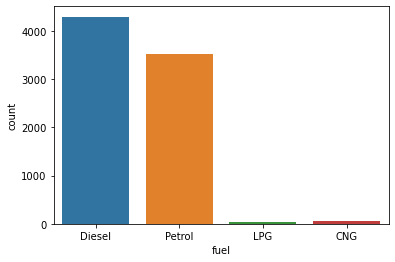

In [22]:
sns.countplot(x='fuel', data=df)
plt.show()

We have 4 catetgories in fuel column with diesel cars leading and very few LPG,CNG cars (35, 52) respectively

In [23]:
df["seller_type"].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

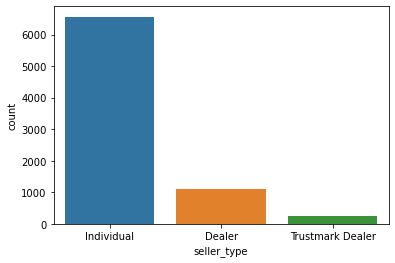

In [24]:
sns.countplot(x='seller_type', data=df)
plt.show()

Most of the sellers (6563) in this platform are individuals

In [25]:
df["transmission"].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

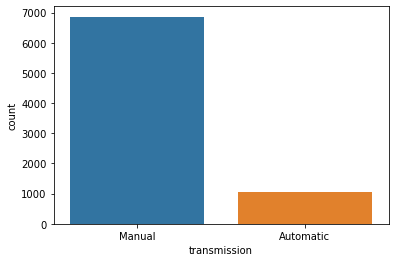

In [26]:
sns.countplot(x='transmission', data=df)
plt.show()

over 6865 cars transmission type is manual

In [27]:
df["owner"].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

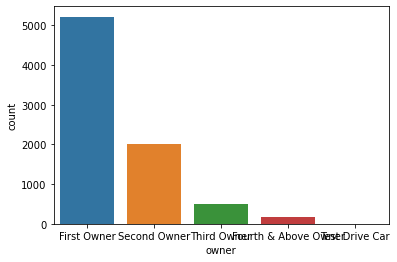

In [28]:
sns.countplot(x='owner', data=df)
plt.show()

Most of the cars are single owner 

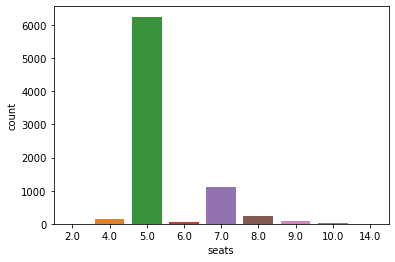

In [29]:
sns.countplot(x='seats', data=df)
plt.show()

Most of them are 5 seater cars followed by 7 seater cars

<AxesSubplot:xlabel='mileage'>

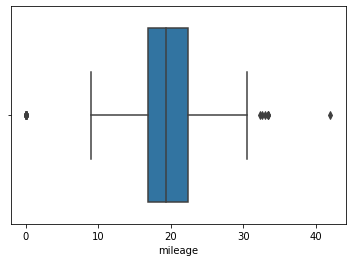

In [30]:
sns.boxplot(x=df['mileage'])

from above boxplot we see some cars having 0 mileage, it does not makesense, need to drop them

In [31]:
df[df["mileage"]==0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
644,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172,65.00,5.0
785,Hyundai Santro Xing GL,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086,62.00,5.0
1649,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5.0
1676,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5.0
2137,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179,115.00,5.0
2366,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086,62.10,5.0
2725,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086,62.10,5.0
4527,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5.0
5276,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5.0
5843,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197,103.25,5.0


In [32]:
# drop rows having 0 mileage
df = df[df["mileage"]!=0]

<AxesSubplot:xlabel='engine'>

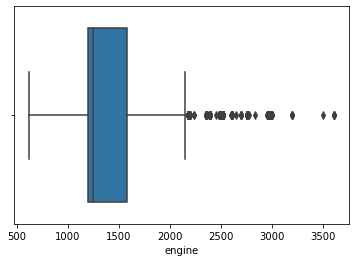

In [33]:
sns.boxplot(x=df['engine'])

In [34]:
df[df["engine"]>3500]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
134,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5.0
1564,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5.0
1860,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5.0
3239,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5.0
5248,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5.0
7703,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5.0


We see all above rows contain same information, lets keep only unique rows dopping duplicates

In [35]:
df = df.drop_duplicates()

In [36]:
df[df["engine"]>3000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
134,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5.0
1530,Ford Endeavour 3.2 Titanium AT 4X4,2018,3250000,12000,Diesel,Individual,Automatic,First Owner,10.91,3198,197.0,7.0
1923,Ford Endeavour 3.2 Titanium AT 4X4,2016,2280000,120000,Diesel,Individual,Automatic,Second Owner,10.91,3198,197.0,7.0
3214,Ford Endeavour 3.2 Titanium AT 4X4,2016,2100000,80000,Diesel,Individual,Automatic,First Owner,10.91,3198,197.0,7.0
5962,Mercedes-Benz E-Class E350 Petrol,2009,1000000,80000,Petrol,Individual,Automatic,Third Owner,10.93,3498,272.0,5.0
6468,Ford Endeavour 3.2 Titanium AT 4X4,2018,3200000,35000,Diesel,Individual,Automatic,First Owner,10.91,3198,197.0,7.0


we have some high end cars having high engine cc

C:\Users\jothi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


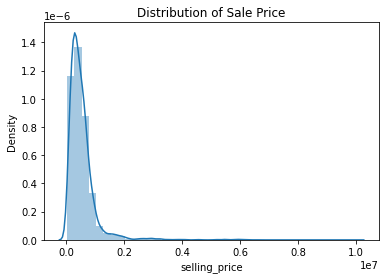

In [37]:
sns.distplot(df["selling_price"], hist=True, kde=True, bins=40).set_title('Distribution of Sale Price')
plt.show()

selling_price is positively skewed

C:\Users\jothi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


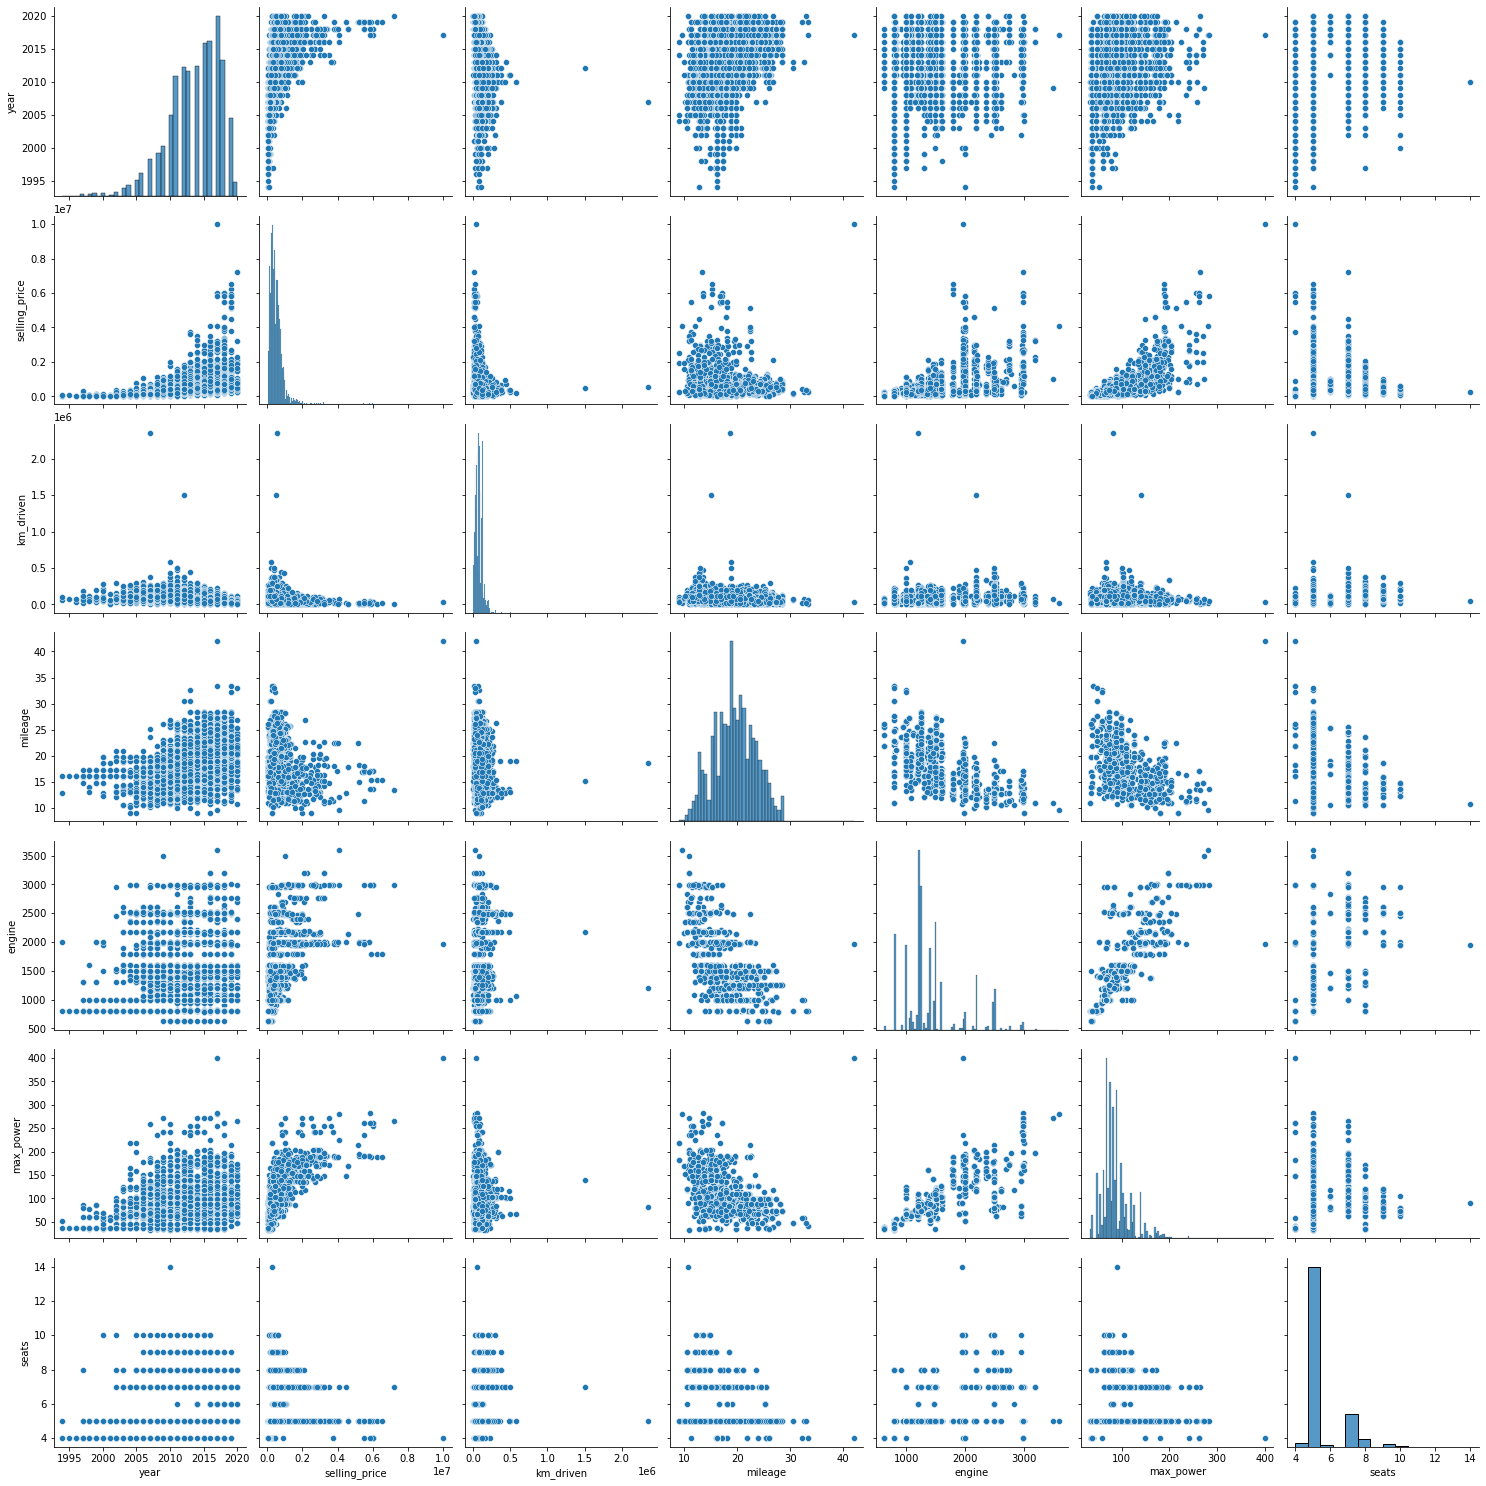

In [38]:
sns.pairplot(df, size = 3)
plt.show()

#### Feature Engineering

In [39]:
# let's extact how many years old the car is from year column and drop year column

df["old"] = 2022-df["year"]
df.drop(["year"],axis=1,inplace=True)

In [40]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,old
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,8
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,16
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,12
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,15


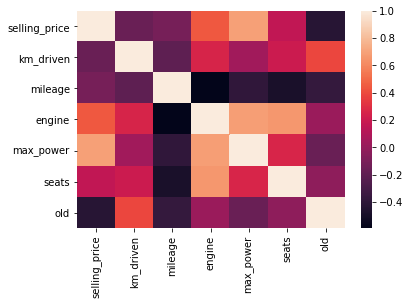

In [41]:
sns.heatmap(df.corr())
plt.show()

selling price is negatively correlated with old variable, km_driven as expected, means as number of years increases or km_driven increses sp decreases <br>
selling price is positevly correlated with max_power and engine <br>

In [42]:
# lets drop car name as it is text 

df.drop(["name"],axis=1,inplace=True)

In [43]:
# split the data into X and y

y = df.pop("selling_price")
X = df

In [44]:
# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

C:\Users\jothi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


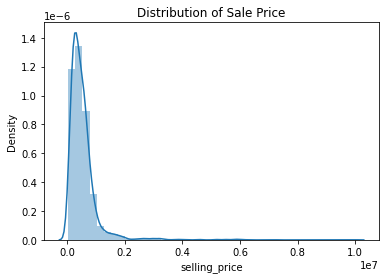

In [45]:
sns.distplot(y_train, hist=True, kde=True, bins=40).set_title('Distribution of Sale Price')
plt.show()

In [46]:
y_train=np.log(y_train)

C:\Users\jothi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


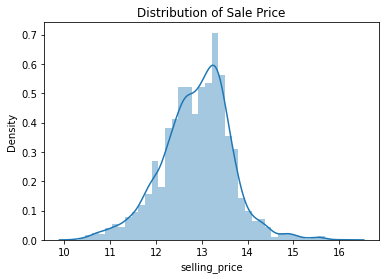

In [47]:
sns.distplot(y_train, hist=True, kde=True, bins=40).set_title('Distribution of Sale Price')
plt.show()

In [48]:
# select categorical data and apply get_dummies function on them
categorical_df = X_train.select_dtypes(include=['object',"category"])
dummies = pd.get_dummies(categorical_df, drop_first=True)

# drop categories for which we created dummy variables
X_train = X_train.drop(list(categorical_df.columns), axis=1)

# concat both dummy vars df and original df
X_train = pd.concat([X_train,dummies], axis=1)

In [49]:
# Apply min max scaling to bring down the values to range from 0-1
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns,index=X_train.index)
X_train.head()

,km_driven,mileage,engine,max_power,seats,old,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4868,-0.220865,-1.534467,0.733573,1.164683,-0.443291,1.418576,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,1.596374,-0.020653,-0.279984
5967,-0.542044,0.824921,-1.284290,-1.271397,-0.443291,-0.370210,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,-0.626419,-0.020653,-0.279984
2512,0.742672,0.132766,-0.065080,-0.622403,-0.443291,0.907494,0.924599,-0.076086,-0.901441,0.336443,-0.063771,0.299015,-0.15351,-0.626419,-0.020653,-0.279984
6869,-1.104107,1.438766,-1.278224,-1.083282,-0.443291,-0.881292,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,-0.626419,-0.020653,-0.279984
4556,-0.220865,1.117950,-1.632058,-1.579277,-1.465649,-0.370210,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,-0.626419,-0.020653,-0.279984


In [50]:
reg = LinearRegression() 
reg.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred_train = reg.predict(X_train)

In [52]:
# lets see the metrics

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

0.8483545829035097
0.08643394528403037


In [53]:
# Apply same steps on test data as performed for training data
y_test=np.log(y_test)
# apply log transformation on y_train

# select categorical data and apply get_dummies function on them
categorical_df = X_test.select_dtypes(include=['object',"category"])
dummies = pd.get_dummies(categorical_df, drop_first=True)

# drop categories for which we created dummy variables
X_test = X_test.drop(list(categorical_df.columns), axis=1)

# concat both dummy vars df and original df
X_test = pd.concat([X_test,dummies], axis=1)

# Apply min max scaling to bring down the values to range from 0-1
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns,index=X_test.index)
X_test.head()

,km_driven,mileage,engine,max_power,seats,old,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2844,0.501787,0.991644,-0.370388,-0.434288,-0.443291,0.140872,0.924599,-0.076086,-0.901441,0.336443,-0.063771,0.299015,-0.15351,-0.626419,-0.020653,3.571638
1691,-1.104107,0.291911,-0.471483,-0.653755,-0.443291,-1.136833,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,1.596374,-0.020653,-0.279984
2939,-1.023813,-1.036823,-0.475527,-0.465641,-0.443291,-0.881292,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,-0.626419,-0.020653,-0.279984
675,0.100314,-0.094583,-0.473505,-0.183469,-0.443291,-0.625751,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,1.596374,-0.020653,-0.279984
3701,-0.060276,-0.220889,-0.473505,-0.064330,-0.443291,0.396412,-1.081550,-0.076086,1.109334,0.336443,-0.063771,0.299015,-0.15351,1.596374,-0.020653,-0.279984


In [54]:
y_pred_test = reg.predict(X_test)

In [55]:
# lets see the metrics
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)


0.8313518193268636
0.09125037716365741


we got 84.9% accuacy on train data and 83.2% accuracy on test data which is quite good

In [56]:
y_pred_test

array([12.64079496, 12.99329237, 12.93838788, ..., 12.88269432,
       12.5333572 , 13.25936326])

In [57]:
X_train.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'old',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [58]:
X_train.shape

(4691, 16)

In [59]:
import pickle
Pkl_Filename = "bcp.pkl"  
pickle.dump(reg, open(Pkl_Filename, 'wb'))

In [60]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LinearRegression()

In [61]:
score = Pickled_LR_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)  

Ypredict

Test score: 83.14 %


array([12.64079496, 12.99329237, 12.93838788, ..., 12.88269432,
       12.5333572 , 13.25936326])

In [62]:
PklFilename = "ssc.pkl"  
pickle.dump(scaler, open(PklFilename, 'wb'))

In [63]:
with open(PklFilename, 'rb') as file:  
    PickledModel = pickle.load(file)

print(PickledModel)

StandardScaler()


In [64]:
print(y_train)

4868    11.918391
5967    12.506177
2512    12.206073
6869    12.560244
4556    11.289782
          ...    
988     13.910821
6239    13.592367
4721    13.527828
244     13.458836
6196    12.332705
Name: selling_price, Length: 4691, dtype: float64


In [65]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [66]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
y_pred_train1 = dt.predict(X_train)

In [68]:
r2_train_lr = r2_score(y_train, y_pred_train1)
print(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train1)
print(mse_train_lr)

0.998066790351064
0.0011018792405204799


In [69]:
y_pred_test1 = dt.predict(X_test)

In [70]:
r2_test_lr = r2_score(y_test, y_pred_test1)
print(r2_test_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test1)
print(mse_test_lr)


0.8393871786609937
0.08690268976520286


In [71]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [72]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [73]:
y_pred_train2 = rf.predict(X_train)

In [74]:
r2_train_lr = r2_score(y_train, y_pred_train2)
print(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train2)
print(mse_train_lr)

0.985708388637184
0.00814584692505586


In [75]:
y_pred_test2 = rf.predict(X_test)

In [76]:
r2_test_lr = r2_score(y_test, y_pred_test2)
print(r2_test_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test2)
print(mse_test_lr)

0.9066434494481621
0.050512376798561
